# 4.3


In [1]:
import operator

def max_min( dictionary ):
    max_el = max(dictionary.items(), key=operator.itemgetter(1))[0]
    min_el = min(dictionary.items(), key=operator.itemgetter(1))[0]
    return "\tMAX({}) : {}\n\tMIN({}) : {}".format(
        max_el,
        dictionary[max_el],
        min_el,
        dictionary[min_el],
    )

def latex( name,  dictionary ):
    max_el = max(dictionary.items(), key=operator.itemgetter(1))[0]
    min_el = min(dictionary.items(), key=operator.itemgetter(1))[0]
    return "\tmax & {0}(x)= {0}({1})={2}\n\tmin & {0}(x)={0}({3})={4}".format(
        name,
        max_el,
        dictionary[max_el], 
        min_el,
        dictionary[min_el],
    )

def min_max_result(points, Z_1_L, Z_1_U, Z_2_L, Z_2_U):

    Z_1_L_D = {key:Z_1_L(point[0], point[1]) for key, point in points.items()}
    print("Z1L: Pesimist\n {}\n".format( latex("Z_{1L}", Z_1_L_D)))

    Z_1_U_D = {key:Z_1_U(point[0], point[1]) for key, point in points.items()}
    print("Z1U: Optimist\n {}\n".format( latex("Z_{1U}", Z_1_U_D)))


    Z_2_L_D = {key:Z_2_L(point[0], point[1]) for key, point in points.items()}
    print("Z2L: Optimist\n {}\n".format( latex("Z_{2L}", Z_2_L_D)))

    Z_2_U_D = {key:Z_2_U(point[0], point[1]) for key, point in points.items()}
    print("Z2U: Optimist\n {}\n".format( latex("Z_{2U}", Z_2_U_D)))


def print_points(points):
    strings = [ "{:>9} ".format(i) for i in points.keys() ]
    print( '{:<20}  {}'.format("", "|".join(strings)) )
    print("-"*(76))
    for func, callback in funcs.items():

        strings = [callback(point[0], point[1]) for point in points.values()]

        strings = [ " {:>2.4f} ".format(i) for i in strings ]
        strings = [ "{:>10}".format(i) for i in strings ]

        print( '{:<20}: {}'.format(func, "|".join(strings)) )

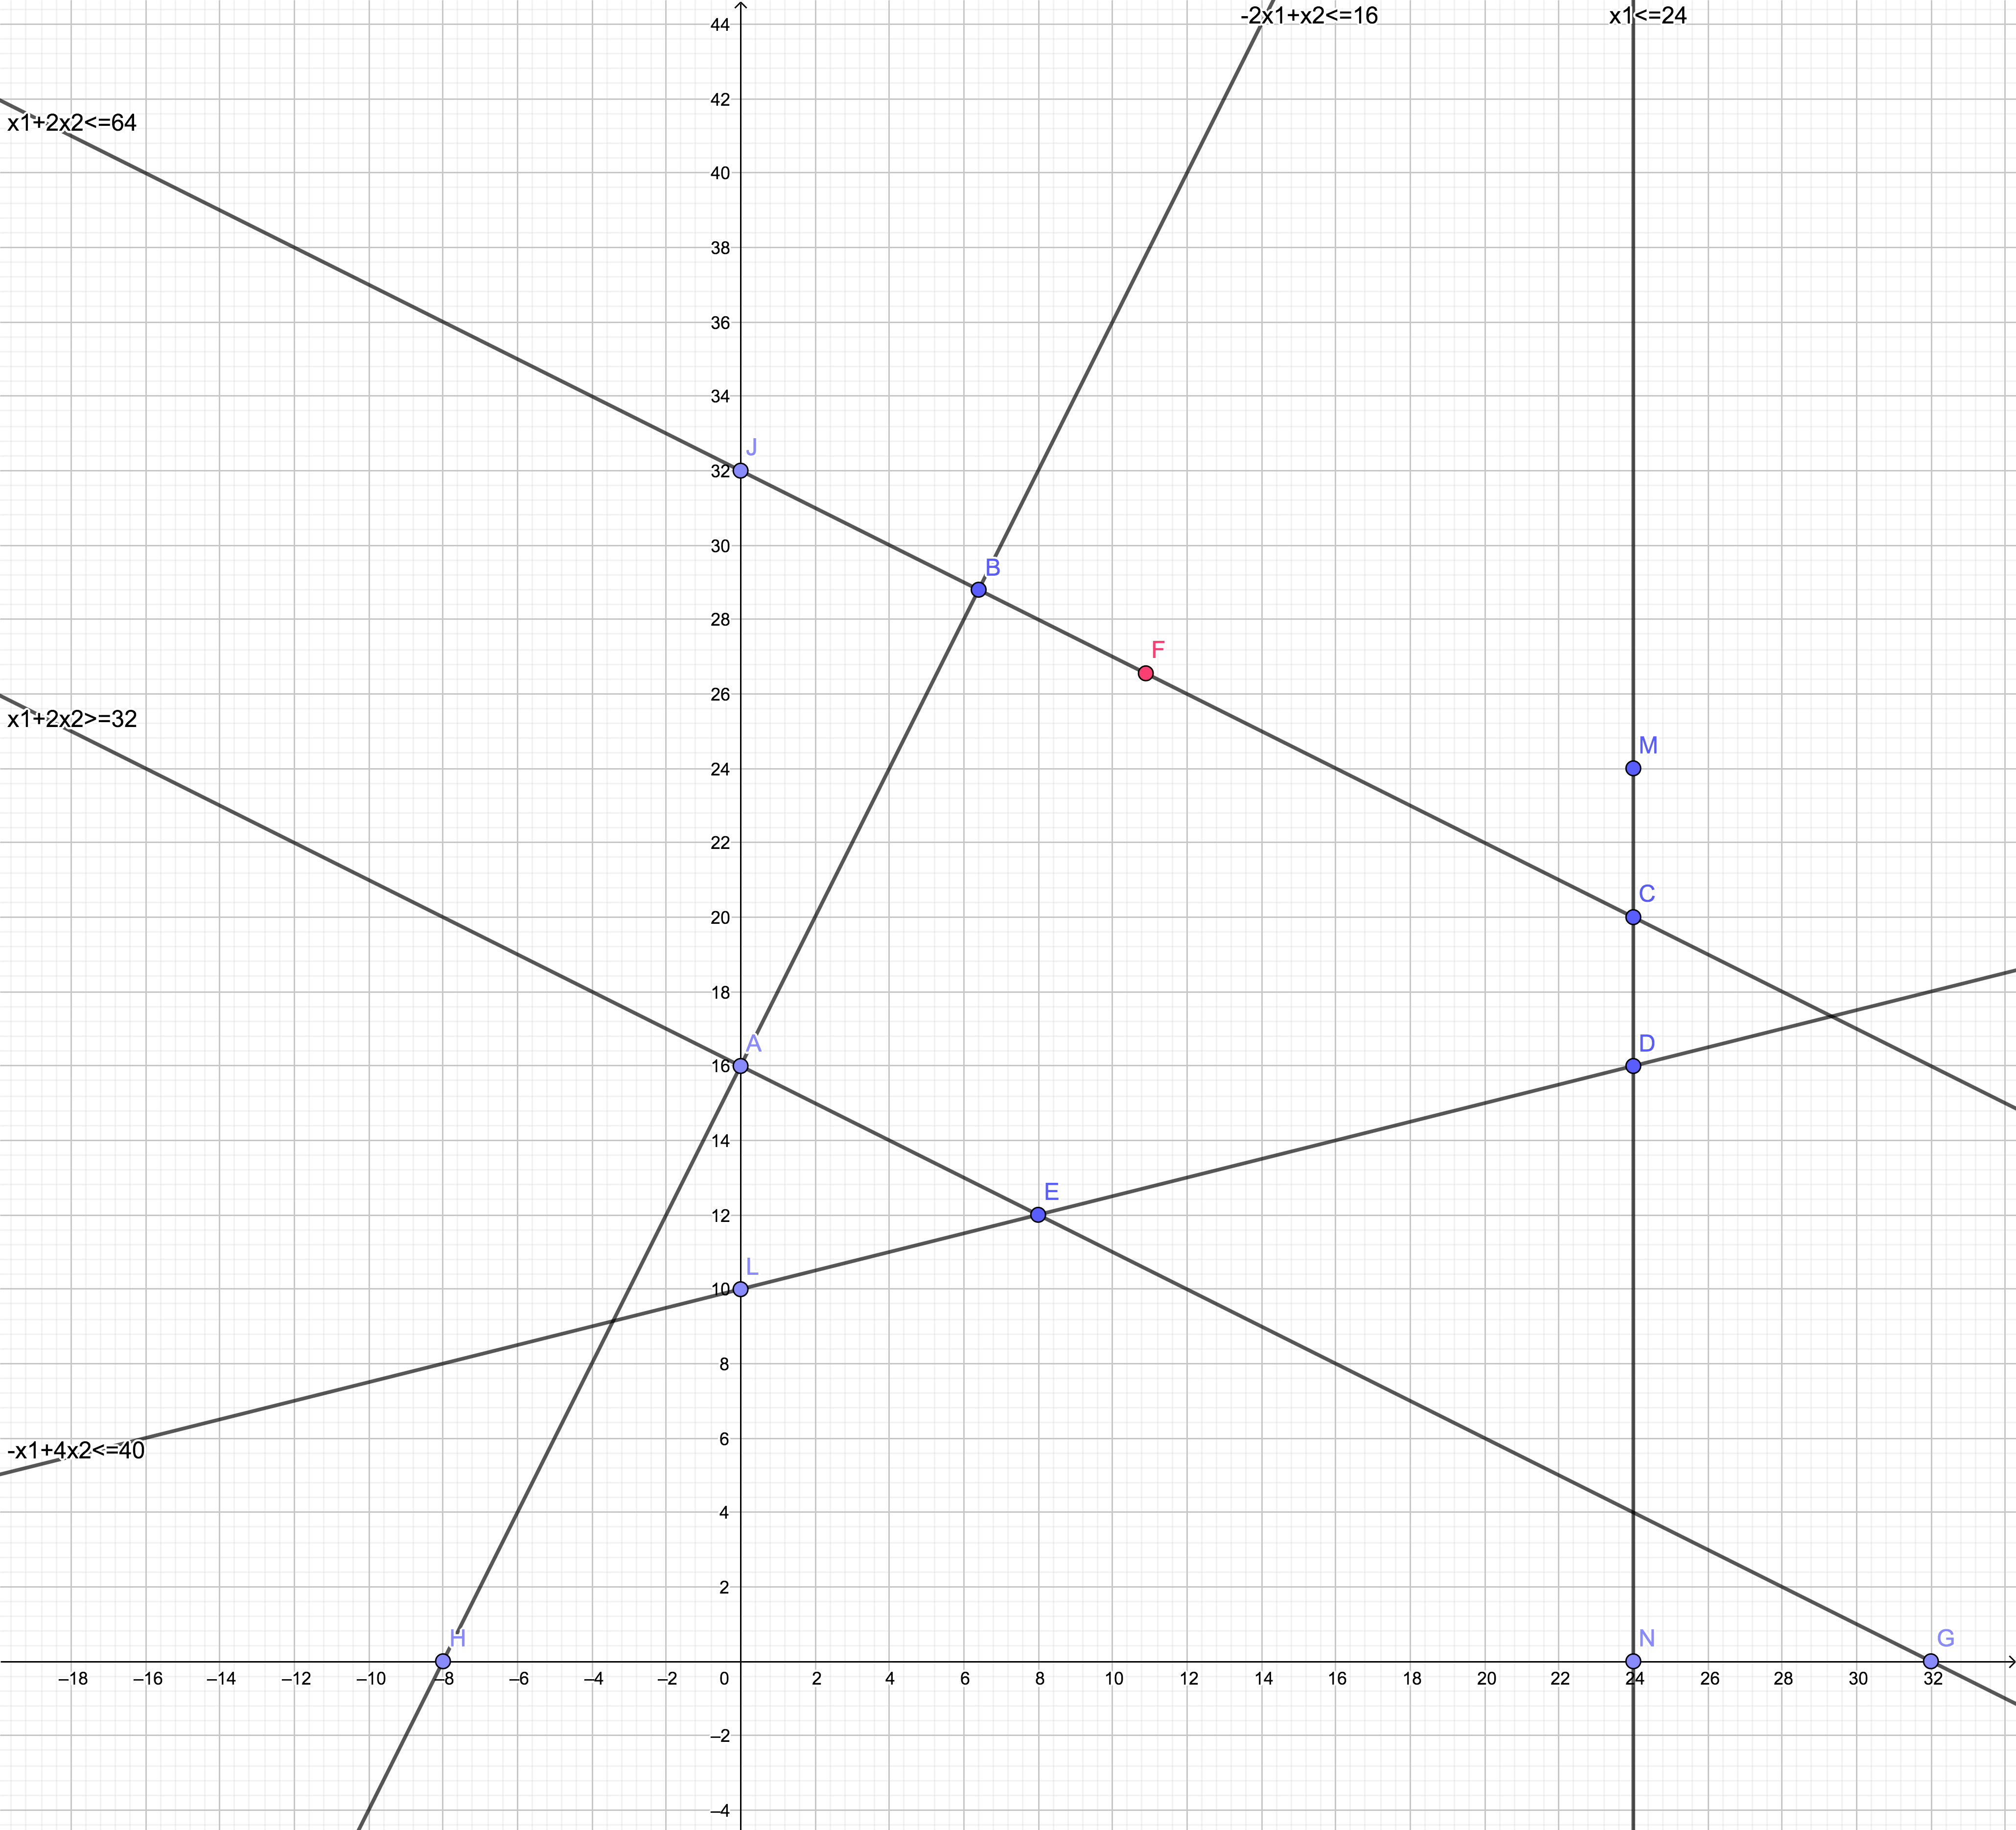

### Part 1

In [2]:
from collections import OrderedDict as dict
points = dict({
    'A' : (0, 16),
    'B' : (6.4, 28.8),
    'C' : (24, 20),
    'D' : (24, 16),
    'E' : (8, 12),
})

funcs = {
    'x1+x2' : (lambda x1, x2: x1+x2),
    '2*x1-x2' : (lambda x1, x2: 2*x1-x2),
}

In [3]:
print_points(points)

                              A |        B |        C |        D |        E 
----------------------------------------------------------------------------
x1+x2               :   16.0000 |  35.2000 |  44.0000 |  40.0000 |  20.0000 
2*x1-x2             :  -16.0000 | -16.0000 |  28.0000 |  32.0000 |   4.0000 


Знаходимо точки що задовольняють наш розвязок (`max` для критерія максимізації і `min` для критерія мінімізації)

`B <-> C` ефективний план

* $ 
\text{max} \qquad W_{1}^{'} = \dfrac{f^0_1-f_1(x)}{f^0_1-f_{1_{max}}} = \dfrac{44 - (x_1+x_2) }{44-16} = \dfrac{44 - x_1 - x_2 }{28}
$
---
* $
\text{min} \qquad W_{2}^{'} = \dfrac{f_2(x)-f^0_2}{f^0_{2_{max}} - f^0_2 } = \dfrac{(2x_1-x_2)+16}{32-(-16)}  = \dfrac{ 2x_1-x_2 +16}{48}
$

### Загальна форма

$$
max \to W_1 = \dfrac{f^0_1 - f(x)}{f^0_1 - f^0_{1_{min}} }
$$

---

$$
min \to W_2 = \dfrac{f_2(x)-f^0_2}{f^0_{2_{max}} - f^0_2 }
$$


Розвяжемо систему рівнянть методом [Гауса](https://matrix.reshish.ru/gauss-jordanElimination.php)

```
104x1 + 20x2 = 1664
  -x1 +  2x2 = 64
```

$$
x_1 = 10.893617021276597
\qquad
x_2 = 26.5531914893617
$$

---- 


### Part 2

Критерії:

* $max \to C_{11}x_1 + C_{12}x_2$
* $min \to C_{21}x_1 + C_{22}x_2 \to max \to - C_{21}x_1 - C_{22}x_2 $

Обмеження:
`тіж`

Функція належності

1. $ \mu(C_{ij}) = \dfrac{1}{1+(C-\overline{C}_{ij})^2} \geq 0.8$
2. $ \mu(C_{ij}) = \dfrac{1}{0.8} \leq 1+(C-\overline{C}_{ij})^2 $
3. $ \mu(C_{ij}) = \dfrac{1}{0.8} -1 \leq (C-\overline{C}_{ij})^2 $
4. $ \mu(C_{ij}) = \dfrac{1}{4} \leq |C-\overline{C}_{ij}| $
5. $ \mu(C_{ij}) = \overline{C}_{ij} - \dfrac{1}{4} \leq C_{ij} \leq \overline{C}_{ij} + \dfrac{1}{4}$



Дивимось на наші середні значення $C_{ij}$

* $C_{11}$ = `1`
* $C_{12}$ = `1`
* $C_{21}$ = `2`
* $C_{22}$ = `-1`

----

* $C_{11}$ : $ 1-1/4 \leq C_{11} \leq 1+1/4 $
* $C_{12}$ : $ 1-1/4 \leq C_{12} \leq 1+1/4 $
* $C_{21}$ : $ 2-1/4 \leq C_{21} \leq 2+1/4 $
* $C_{22}$ : $ -1-1/4 \leq C_{22} \leq -1+1/4 $

---

* $C_{11}$ : $ 0.75 \leq C_{11} \leq 1.25 $
* $C_{12}$ : $ 0.75 \leq C_{12} \leq 1.25 $
* $C_{21}$ : $ 1.75 \leq C_{21} \leq 2.25 $
* $C_{22}$ : $ -1.25 \leq C_{22} \leq -0.75 $

Підставляємо в наші критерії

* $Z_{1L} = 0.75x_1 + 0.75x_2$
* $Z_{1U} = 1.25x_1 + 1.25x_2$
* $Z_{2L} = -1 \times (1.75x_1 - 1.25x_2)$
* $Z_{2U} = -1 \times (2.25x_1 - 0.75x_2)$



In [3]:
# далі ітеравивно шукаємо результати по точкам

Z_1_L = lambda x1,x2: 0.75*x1+0.75*x2 
Z_1_U = lambda x1,x2: 1.25*x1+1.25*x2 
Z_2_L = lambda x1,x2: -1 * (1.75*x1-1.25*x2) 
Z_2_U = lambda x1,x2: -1 * (2.25*x1-0.75*x2)
    
min_max_result(points, Z_1_L, Z_1_U, Z_2_L, Z_2_U)

Z1L: Pesimist
 	max & Z_{1L}(x)= Z_{1L}(C)=33.0
	min & Z_{1L}(x)=Z_{1L}(A)=12.0

Z1U: Optimist
 	max & Z_{1U}(x)= Z_{1U}(C)=55.0
	min & Z_{1U}(x)=Z_{1U}(A)=20.0

Z2L: Optimist
 	max & Z_{2L}(x)= Z_{2L}(B)=24.799999999999997
	min & Z_{2L}(x)=Z_{2L}(D)=-22.0

Z2U: Optimist
 	max & Z_{2U}(x)= Z_{2U}(A)=12.0
	min & Z_{2U}(x)=Z_{2U}(D)=-42.0



-----

$max \lambda$

* $(33.0 - 12.0) \lambda - (0.75x_1 + 0.75x_2) \leq - 12.0$
* $(55.0 - 20.0) \lambda - (1.25x_1 + 1.25x_2) \leq - 20.0$
* $(24.8 + 22) \lambda + (1.75x_1 - 1.25x_2) \leq 22$
* $(12 + 42 ) \lambda + (2.25x_1 - 0.75x_2) \leq 42$